In [1]:
import colorcet as cc

def bar_plot(ax, data, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]], total_width=0.8, single_width=1, legend=True):
    """Draws a bar plot with multiple bars per data point.

    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.

    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }

    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)

    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.

    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.

    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys())
    if legend==False:
        return bars

/tmp/ipykernel_1878888/1441670229.py:18: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
/tmp/ipykernel_1878888/1441670229.py:18: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))


   set_id  method  I_value  r_value
0     3.0    :ac:     37.4    0.178
1     3.0  :acsh:     44.6    0.140
2     3.0    :sh:     21.9    0.193
0     3.5    :ac:     42.3    0.163
1     3.5  :acsh:     49.9    0.134
2     3.5    :sh:     31.9    0.159


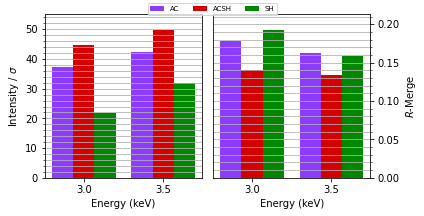

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.ticker as mticker

# Put the path to your data files here
file_paths = [
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_2/merged_data/csvs/3p0_I_and_r_merge.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_2/merged_data/csvs/3p5_I_and_r_merge.csv'
]

# Read and concatenate all datasets, adding a 'set_id' to distinguish them
all_data = []
methods = ['method:acsh:', 'method:sh:', 'method:ac:']

for i, file_path in enumerate(file_paths, start=1):
    df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
    #df['set_id'] = f"Set {i}"  # Adding a set identifier
    df['set_id'] = df['set_id'].replace(to_replace='_', value=': ')
    all_data.append(df)

# Concatenating all the dataframes
combined_data = pd.concat(all_data)

ac = combined_data[combined_data['method']==':ac:']
acsh = combined_data[combined_data['method']==':acsh:']
sh = combined_data[combined_data['method']==':sh:']


n = len(file_paths)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(6,3))
data1 = {'AC':ac['I_value'].to_list(), 'ACSH':acsh['I_value'].to_list(), 'SH':sh['I_value'].to_list()}
bars = bar_plot(ax1, data1, legend=False, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
#ax1.legend(bars, data1.keys(), ncols=3, fontsize='x-small', bbox_to_anchor=(1.6,1.15))
ax1.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax1.set_xticks(list(np.arange(n)))
#ax1.set_xticklabels([list(ac['set_id'])[i].replace(to_replace='_', value=': ') for i in range(n)])
ax1.set_xticklabels([list(ac['set_id'])[i] for i in range(n)])
ax1.set_ylabel("Intensity / $\sigma$")
ax1.set_xlabel("Energy (keV)")
lim = ax1.get_ylim()
ax1.set_ylim(lim[0], lim[1]*1.05)

data2 = {'AC':ac['r_value'].to_list(), 'ACSH':acsh['r_value'].to_list(), 'SH':sh['r_value'].to_list()}
bars2 = bar_plot(ax2, data2, legend=False)
#ax1.legend(bars, data1.keys(), ncols=3, fontsize='x-small', bbox_to_anchor=(1,1.15))
ax2.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax2.set_xticks([0,1])
ax2.set_xticklabels([list(ac['set_id'])[i] for i in range(n)])
ax2.set_ylabel("$R$-Merge")
ax2.set_xlabel("Energy (keV)")
lim = ax2.get_ylim()
ax2.set_ylim(lim[0], lim[1]*1.05)
ax2.yaxis.set_ticks_position('right')
ax2.yaxis.set_label_position('right')
fig.legend(bars, data1.keys(), ncols=3, fontsize='x-small', loc='upper center')
fig.tight_layout()
#plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_2_P1/stats.pdf')
ax1.grid(axis='y', which='both')
ax2.grid(axis='y', which='both')
fig.tight_layout()
plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_2_P6122/merged_stats.png', dpi=300)

In [3]:

import pdb
import numpy as np

import json
import os
import re
import csv
    
single_pth='/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_2/merged_data/dimple'
prefix='auto'
data_list=[]
for dir_pth in os.listdir(single_pth):
    if os.path.isdir(os.path.join(single_pth, dir_pth)) is False:
        continue
    
    data_list.append(dir_pth)

sorted_data_list = sorted(data_list)

dataset_list= sorted_data_list
#single_num=len(sorted_data_list)
single_num=len(data_list)
print(dataset_list)


for dir_pth in (dataset_list):#'SD_A:MET122', 
    final_result=[['energy', 'method', 'ZN_A:ZN405','ZN_B:ZN405','ZN_C:ZN405','ZN_D:ZN405','ZN_E:ZN405','ZN_F:ZN405','ZN_G:ZN405','ZN_H:ZN405','ZN_I:ZN405','ZN_J:ZN405','ZN_K:ZN405','ZN_L:ZN405','SD_A:MET205', 'SD_B:MET205', 'SD_C:MET205', 'SD_D:MET205', 'SD_E:MET205', 'SD_F:MET205', 'SD_G:MET205', 'SD_H:MET205', 'SD_I:MET205', 'SD_J:MET205', 'SD_K:MET205', 'SD_L:MET205', 'SD_A:MET120', 'SD_B:MET120', 'SD_C:MET120', 'SD_D:MET120', 'SD_E:MET120', 'SD_F:MET120', 'SD_G:MET120', 'SD_H:MET120','SD_I:MET120', 'SD_J:MET120', 'SD_K:MET120', 'SD_L:MET120', 'O2_B:SO41']]
    final_result=[['energy', 'method', 'ZN_A:ZN405', 'SD_A:MET205', 'SD_A:MET120', 'O2_B:SO41']]
    counter=0
    atoms_to_find = final_result[0][2:]

    for target in ['acsh','sh', 'ac']:
        i = dataset_list.index(dir_pth)
        #try:
            #if i < single_num:
        with open(os.path.join(single_pth, dir_pth, target, 'anode.lsa'), 'r') as file:
            lines = file.readlines()

        #except:
            #continue
            
        # Find the start and end indices of the table
        start_index = None
        end_index = None
        for i, line in enumerate(lines):
            if '          X        Y        Z   Height(sig)  SOF     Nearest atom' in line:
                start_index = i + 2#1
                
            elif 'Peaks output to file' in line:
                end_index = i - 1
                
        print(f'{dir_pth}, {target}')
        
        table_data = []
        atom_list = []
        peak_list = []
        for line in lines[start_index:end_index]:
            
            # Remove leading/trailing whitespaces and split the line into columns
            columns = line.strip().split()
            atom_list.append(columns[-1])
            peak_list.append(columns[4])

            # Convert the columns to floats
            row_data = [col for col in columns]
            table_data.append(row_data)
        
        # Convert the table data to a NumPy array
        #table_array = np.array(table_data)
        row=[f'{dir_pth}']
        row.append(f':{target}:')

        for label in atoms_to_find:

            if atom_list.count(label) > 1:
                indexes = (np.where(np.array(atom_list) == label))[0]#.tolist()
                #duplicate_peaks = peak_list[atom_list.index('ZN_C:ZN405')]
                duplicate_peaks = np.array(peak_list)[indexes]
                duplicate_peaks = np.asarray(duplicate_peaks, dtype=float)
                max_peak = np.max((duplicate_peaks))
                print(max_peak)
                row.append(str(max_peak))

            elif atom_list.count(label) == 1:
                row.append(peak_list[atom_list.index(label)])
            
            elif any(atom == label for atom in atom_list) == False:
                row.append('nan')

        final_result.append(row)

        dataset_filename = f'/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_2/merged_data/csvs/{dir_pth}_peaks.csv'.format(target)
        with open(dataset_filename, 'w') as dataset_file:
            writer = csv.writer(dataset_file)
            for r in final_result:
                writer.writerow(r)
        #dataset_file.close()


['3p0', '3p5']
3p0, acsh
3p0, sh
3p0, ac
3p5, acsh
17.63
13.19
3p5, sh
17.46
12.09
3p5, ac
16.73
13.43


           method set_id        label  value
0    method:acsh:  Set 1   ZN_A:ZN405  11.83
1      method:sh:  Set 1   ZN_A:ZN405  10.72
2      method:ac:  Set 1   ZN_A:ZN405  10.80
3    method:acsh:  Set 2   ZN_A:ZN405  12.11
4      method:sh:  Set 2   ZN_A:ZN405  10.59
5      method:ac:  Set 2   ZN_A:ZN405  11.16
6    method:acsh:  Set 3   ZN_A:ZN405  13.14
7      method:sh:  Set 3   ZN_A:ZN405   8.00
8      method:ac:  Set 3   ZN_A:ZN405  12.32
108  method:acsh:  Set 1  SD_A:MET205  19.90
109    method:sh:  Set 1  SD_A:MET205  16.56
110    method:ac:  Set 1  SD_A:MET205  16.98
111  method:acsh:  Set 2  SD_A:MET205  17.22
112    method:sh:  Set 2  SD_A:MET205  15.28
113    method:ac:  Set 2  SD_A:MET205  15.89
114  method:acsh:  Set 3  SD_A:MET205  16.34
115    method:sh:  Set 3  SD_A:MET205  11.55
116    method:ac:  Set 3  SD_A:MET205  15.00
216  method:acsh:  Set 1  SD_A:MET120  12.90
217    method:sh:  Set 1  SD_A:MET120  10.60
218    method:ac:  Set 1  SD_A:MET120  10.97
219  metho

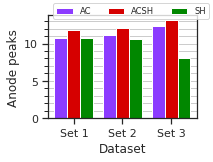

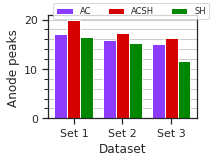

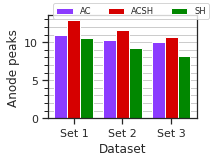

In [8]:
# Put the path to your data files here
file_paths = [
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_2/csv_files/3p0_1_peaks.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_2/csv_files/3p0_2_peaks.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_2/csv_files/3p0_3_peaks.csv'
]

# Read and concatenate all datasets, adding a 'set_id' to distinguish them
all_data = []
methods = ['method:acsh:', 'method:sh:', 'method:ac:']

for i, file_path in enumerate(file_paths, start=1):
    df = pd.read_csv(file_path)
    df['set_id'] = f"Set {i}"  # Adding a set identifier
    all_data.append(df)

# Concatenating all the dataframes
combined_data = pd.concat(all_data)

# Melting the combined DataFrame
melted_combined_data = combined_data.melt(id_vars=['method', 'set_id'], var_name='label', value_name='value')
filtered_combined_data = melted_combined_data.dropna(subset=['value'])
print(filtered_combined_data)

#Zn_plot = filtered_combined_data[filtered_combined_data['label']=='ZN_A:ZN405']
Zn_plot = filtered_combined_data[filtered_combined_data['label'].str.contains('ZN405')]
M205_plot = filtered_combined_data[filtered_combined_data['label'].str.contains('MET205')]
M120_plot = filtered_combined_data[filtered_combined_data['label'].str.contains('MET120')]

final_averages = [[], [], []]
i = 0
for atom in [Zn_plot, M205_plot, M120_plot]:
    i +=1
    print(i)
    ac = atom[atom['method']=='method:ac:']
    acsh = atom[atom['method']=='method:acsh:']
    sh = atom[atom['method']=='method:sh:']

    final_averages[0].append(np.average(ac['value']))
    final_averages[1].append(np.average(acsh['value']))
    final_averages[2].append(np.average(sh['value']))

    #print(final_averages)
    
    n = len(file_paths)
    
    #fig, (ax1, ax2) = plt.subplots(1,3,figsize=(6.5,3))
    fig, ax = plt.subplots(figsize=(3,2.3))
    data = {'AC':ac['value'].to_list(), 'ACSH':acsh['value'].to_list(), 'SH':sh['value'].to_list()}
    bars = bar_plot(ax, data, legend=False, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
    #ax1.legend(bars, data1.keys(), ncols=3, fontsize='x-small', bbox_to_anchor=(1.6,1.15))
    ax.yaxis.set_minor_locator(mticker.AutoMinorLocator())
    ax.set_xticks([0,1,2])
    #ax1.set_xticks(list(np.arange(n-1)))
    ax.set_xticklabels([list(ac['set_id'])[i] for i in range(n)])
    ax.set_ylabel("Anode peaks")
    ax.set_xlabel("Dataset")
    fig.legend(bars, data.keys(), ncols=3, fontsize='x-small', loc='upper right')
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')
    ax.grid(axis='y', which='both')
   
    fig.tight_layout()
    if i == 1:
        plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_2_P6122/peaks/3p0_zinc.pdf')
        plt.savefig('/home/icf19162/Desktop/3p0_zinc.pdf')
    if i == 2:
        plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_2_P6122/peaks/3p0_met250.pdf')
        plt.savefig('/home/icf19162/Desktop/3p0_met250.pdf')
    if i == 3:
        plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_2_P6122/peaks/3p0_met120.pdf')
        plt.savefig('/home/icf19162/Desktop/3p0_met120.pdf')

/tmp/ipykernel_1878888/720995289.py:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
/tmp/ipykernel_1878888/720995289.py:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
/tmp/ipykernel_1878888/720995289.py:61: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


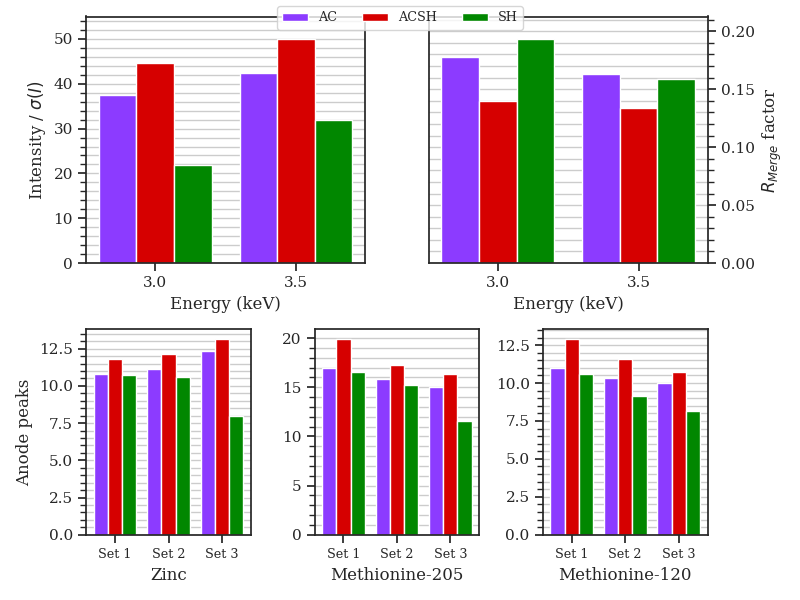

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
fig = plt.figure(figsize=(8, 6),layout='constrained')
plt.rcParams['font.size']=11
plt.rcParams['text.usetex']=False
plt.rcParams['font.family']='serif'
axd = fig.subplot_mosaic(
    """
    AAABBB
    CCDDEE
    """, height_ratios=(1.2, 1))
file_paths = [
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_2/merged_data/csvs/3p0_I_and_r_merge.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_2/merged_data/csvs/3p5_I_and_r_merge.csv'
]
# Read and concatenate all datasets, adding a 'set_id' to distinguish them
all_data = []
methods = ['method:acsh:', 'method:sh:', 'method:ac:']

for i, file_path in enumerate(file_paths, start=1):
    df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
    #df['set_id'] = f"Set {i}"  # Adding a set identifier
    df['set_id'] = df['set_id'].replace(to_replace='_', value=': ')
    all_data.append(df)

# Concatenating all the dataframes
combined_data = pd.concat(all_data)

ac = combined_data[combined_data['method']==':ac:']
acsh = combined_data[combined_data['method']==':acsh:']
sh = combined_data[combined_data['method']==':sh:']


n = len(file_paths)
ax1, ax2 = (axd['A'], axd['B'])
data1 = {'AC':ac['I_value'].to_list(), 'ACSH':acsh['I_value'].to_list(), 'SH':sh['I_value'].to_list()}
bars = bar_plot(ax1, data1, legend=False, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
#ax1.legend(bars, data1.keys(), ncols=3, fontsize='x-small', bbox_to_anchor=(1.6,1.15))
ax1.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax1.set_xticks(list(np.arange(n)))
#ax1.set_xticklabels([list(ac['set_id'])[i].replace(to_replace='_', value=': ') for i in range(n)])
ax1.set_xticklabels([list(ac['set_id'])[i] for i in range(n)])
ax1.set_ylabel("Intensity / $\sigma(I)$")
ax1.set_xlabel("Energy (keV)")
lim = ax1.get_ylim()
ax1.set_ylim(lim[0], lim[1]*1.05)

data2 = {'AC':ac['r_value'].to_list(), 'ACSH':acsh['r_value'].to_list(), 'SH':sh['r_value'].to_list()}
bars2 = bar_plot(ax2, data2, legend=False,  colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
#ax1.legend(bars, data1.keys(), ncols=3, fontsize='x-small', bbox_to_anchor=(1,1.15))
ax2.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax2.set_xticks([0,1])
ax2.set_xticklabels([list(ac['set_id'])[i] for i in range(n)])
ax2.set_ylabel("$R_{Merge}$ factor")
ax2.set_xlabel("Energy (keV)")
lim = ax2.get_ylim()
ax2.set_ylim(lim[0], lim[1]*1.05)
ax2.yaxis.set_ticks_position('right')
ax2.yaxis.set_label_position('right')
#fig.legend(bars, data1.keys(), ncols=3, fontsize='x-small', loc='upper center')
fig.tight_layout()
#plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_2_P1/stats.pdf')
ax1.grid(axis='y', which='both')
ax2.grid(axis='y', which='both')
ax1.set_axisbelow(True)
ax2.set_axisbelow(True)

#ax = axd['C']
# Put the path to your data files here
file_paths = [
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_2/csv_files/3p0_1_peaks.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_2/csv_files/3p0_2_peaks.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_2/csv_files/3p0_3_peaks.csv'
]

# Read and concatenate all datasets, adding a 'set_id' to distinguish them
all_data = []
methods = ['method:acsh:', 'method:sh:', 'method:ac:']

for i, file_path in enumerate(file_paths, start=1):
    df = pd.read_csv(file_path)
    df['set_id'] = f"Set {i}"  # Adding a set identifier
    all_data.append(df)

# Concatenating all the dataframes
combined_data = pd.concat(all_data)

# Melting the combined DataFrame
melted_combined_data = combined_data.melt(id_vars=['method', 'set_id'], var_name='label', value_name='value')
filtered_combined_data = melted_combined_data.dropna(subset=['value'])

#Zn_plot = filtered_combined_data[filtered_combined_data['label']=='ZN_A:ZN405']
Zn_plot = filtered_combined_data[filtered_combined_data['label'].str.contains('ZN405')]
M205_plot = filtered_combined_data[filtered_combined_data['label'].str.contains('MET205')]
M120_plot = filtered_combined_data[filtered_combined_data['label'].str.contains('MET120')]

final_averages = [[], [], []]

for atom in [Zn_plot]:
    ac = atom[atom['method']=='method:ac:']
    acsh = atom[atom['method']=='method:acsh:']
    sh = atom[atom['method']=='method:sh:']

    final_averages[0].append(np.average(ac['value']))
    final_averages[1].append(np.average(acsh['value']))
    final_averages[2].append(np.average(sh['value']))

n = len(file_paths)

#fig, (ax1, ax2) = plt.subplots(1,3,figsize=(6.5,3))
ax = axd['C']
data = {'AC':ac['value'].to_list(), 'ACSH':acsh['value'].to_list(), 'SH':sh['value'].to_list()}
bars = bar_plot(ax, data, legend=False, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
#ax1.legend(bars, data1.keys(), ncols=3, fontsize='x-small', bbox_to_anchor=(1.6,1.15))
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax.set_xticks([0,1,2])
#ax1.set_xticks(list(np.arange(n-1)))
ax.set_xticklabels([list(ac['set_id'])[i] for i in range(n)], fontsize='small')
ax.set_ylabel("Anode peaks")
ax.set_xlabel("Zinc")
#fig.legend(bars, data.keys(), ncols=3, fontsize='x-small', loc='upper right')
ax.yaxis.set_ticks_position('left')
ax.yaxis.set_label_position('left')
ax.grid(axis='y', which='both')
fig.tight_layout()

ax = axd['D']
for atom in [M205_plot]:
    ac = atom[atom['method']=='method:ac:']
    acsh = atom[atom['method']=='method:acsh:']
    sh = atom[atom['method']=='method:sh:']

    final_averages[0].append(np.average(ac['value']))
    final_averages[1].append(np.average(acsh['value']))
    final_averages[2].append(np.average(sh['value']))

#fig, (ax1, ax2) = plt.subplots(1,3,figsize=(6.5,3))
#ax = axd['D']
data = {'AC':ac['value'].to_list(), 'ACSH':acsh['value'].to_list(), 'SH':sh['value'].to_list()}
bars = bar_plot(ax, data, legend=False, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
#ax1.legend(bars, data1.keys(), ncols=3, fontsize='x-small', bbox_to_anchor=(1.6,1.15))
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax.set_xticks([0,1,2])
#ax1.set_xticks(list(np.arange(n-1)))
ax.set_xticklabels([list(ac['set_id'])[i] for i in range(n)], fontsize='small')
ax.set_xlabel("Methionine-205")
#fig.legend(bars, data.keys(), ncols=3, fontsize='x-small', loc='upper right')
ax.yaxis.set_ticks_position('left')
ax.yaxis.set_label_position('left')
ax.grid(axis='y', which='both')



ax = axd['E']
for atom in [M120_plot]:
    ac = atom[atom['method']=='method:ac:']
    acsh = atom[atom['method']=='method:acsh:']
    sh = atom[atom['method']=='method:sh:']

    final_averages[0].append(np.average(ac['value']))
    final_averages[1].append(np.average(acsh['value']))
    final_averages[2].append(np.average(sh['value']))

#fig, (ax1, ax2) = plt.subplots(1,3,figsize=(6.5,3))
#ax = axd['D']
data = {'AC':ac['value'].to_list(), 'ACSH':acsh['value'].to_list(), 'SH':sh['value'].to_list()}
bars = bar_plot(ax, data, legend=False, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
#ax1.legend(bars, data1.keys(), ncols=3, fontsize='x-small', bbox_to_anchor=(1.6,1.15))
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax.set_xticks([0,1,2])
#ax1.set_xticks(list(np.arange(n-1)))
ax.set_xticklabels([list(ac['set_id'])[i] for i in range(n)], fontsize='small')

ax.yaxis.set_ticks_position('right')
ax.yaxis.set_label_position('right')
ax2.yaxis.set_ticks_position('right')
ax2.yaxis.set_label_position('right')


#ax.set_ylabel("Anomalous density peaks")
ax.set_xlabel("Methionine-120")
fig.legend(bars, data.keys(), ncols=3, fontsize='small', loc='upper center')
ax.yaxis.set_ticks_position('left')
ax.yaxis.set_label_position('left')
ax.grid(axis='y', which='both')


fig.tight_layout()
# plt.savefig('/home/icf19162/CP5-Thesis/poster_merged_mosaic.pdf')

In [21]:
%matplotlib widget

/tmp/ipykernel_1878888/2579240212.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
/tmp/ipykernel_1878888/2579240212.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
/tmp/ipykernel_1878888/2579240212.py:62: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


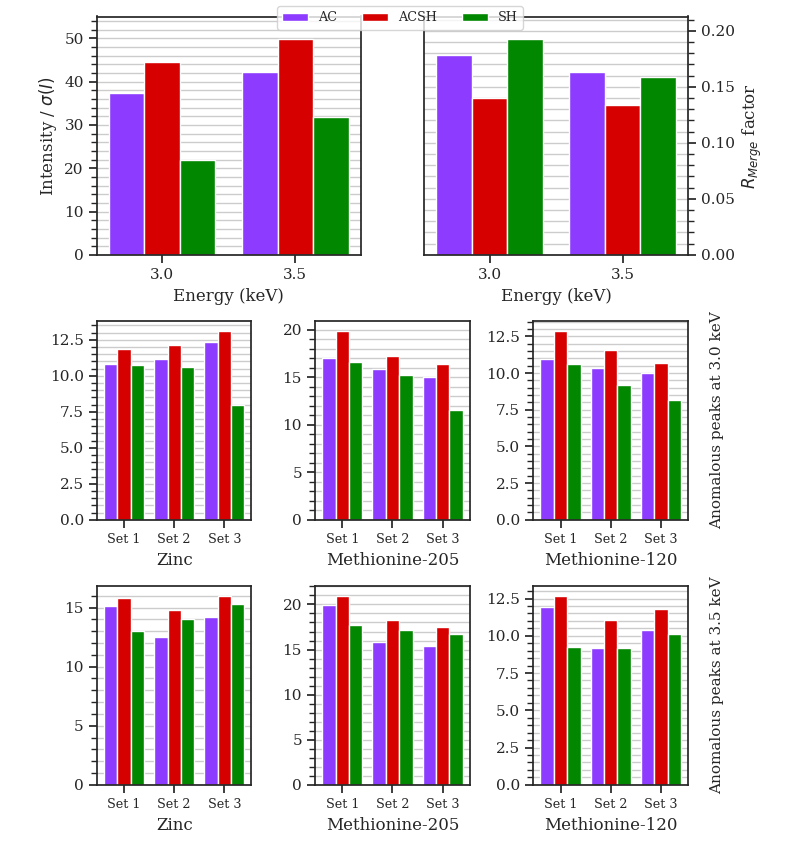

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
fig = plt.figure(figsize=(8, 8.5),layout='constrained')
plt.rcParams['font.size']=11
plt.rcParams['text.usetex']=False
plt.rcParams['font.family']='serif'
axd = fig.subplot_mosaic(
    """
    AAABBB
    CCDDEE
    FFGGHH
    """, height_ratios=(1.2, 1, 1))
file_paths = [
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_2/merged_data/csvs/3p0_I_and_r_merge.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_2/merged_data/csvs/3p5_I_and_r_merge.csv'
]
# Read and concatenate all datasets, adding a 'set_id' to distinguish them
all_data = []
methods = ['method:acsh:', 'method:sh:', 'method:ac:']

for i, file_path in enumerate(file_paths, start=1):
    df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
    #df['set_id'] = f"Set {i}"  # Adding a set identifier
    df['set_id'] = df['set_id'].replace(to_replace='_', value=': ')
    all_data.append(df)

# Concatenating all the dataframes
combined_data = pd.concat(all_data)

ac = combined_data[combined_data['method']==':ac:']
acsh = combined_data[combined_data['method']==':acsh:']
sh = combined_data[combined_data['method']==':sh:']


n = len(file_paths)
ax1, ax2 = (axd['A'], axd['B'])
data1 = {'AC':ac['I_value'].to_list(), 'ACSH':acsh['I_value'].to_list(), 'SH':sh['I_value'].to_list()}
bars = bar_plot(ax1, data1, legend=False, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
#ax1.legend(bars, data1.keys(), ncols=3, fontsize='x-small', bbox_to_anchor=(1.6,1.15))
ax1.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax1.set_xticks(list(np.arange(n)))
#ax1.set_xticklabels([list(ac['set_id'])[i].replace(to_replace='_', value=': ') for i in range(n)])
ax1.set_xticklabels([list(ac['set_id'])[i] for i in range(n)])
ax1.set_ylabel("\nIntensity / $\sigma(I)$")
ax1.set_xlabel("Energy (keV)")
lim = ax1.get_ylim()
ax1.set_ylim(lim[0], lim[1]*1.05)

data2 = {'AC':ac['r_value'].to_list(), 'ACSH':acsh['r_value'].to_list(), 'SH':sh['r_value'].to_list()}
bars2 = bar_plot(ax2, data2, legend=False,  colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
#ax1.legend(bars, data1.keys(), ncols=3, fontsize='x-small', bbox_to_anchor=(1,1.15))
ax2.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax2.set_xticks([0,1])
ax2.set_xticklabels([list(ac['set_id'])[i] for i in range(n)])
ax2.set_ylabel("$R_{Merge}$ factor\n")
ax2.set_xlabel("Energy (keV)")
lim = ax2.get_ylim()
ax2.set_ylim(lim[0], lim[1]*1.05)
ax2.yaxis.set_ticks_position('right')
ax2.yaxis.set_label_position('right')
#fig.legend(bars, data1.keys(), ncols=3, fontsize='x-small', loc='upper center')
fig.tight_layout()
#plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_2_P1/stats.pdf')
ax1.grid(axis='y', which='both')
ax2.grid(axis='y', which='both')
ax1.set_axisbelow(True)
ax2.set_axisbelow(True)

#ax = axd['C']
# Put the path to your data files here
file_paths = [
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_2/csv_files/3p0_1_peaks.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_2/csv_files/3p0_2_peaks.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_2/csv_files/3p0_3_peaks.csv'
]

# Read and concatenate all datasets, adding a 'set_id' to distinguish them
all_data = []
methods = ['method:acsh:', 'method:sh:', 'method:ac:']

for i, file_path in enumerate(file_paths, start=1):
    df = pd.read_csv(file_path)
    df['set_id'] = f"Set {i}"  # Adding a set identifier
    all_data.append(df)

# Concatenating all the dataframes
combined_data = pd.concat(all_data)

# Melting the combined DataFrame
melted_combined_data = combined_data.melt(id_vars=['method', 'set_id'], var_name='label', value_name='value')
filtered_combined_data = melted_combined_data.dropna(subset=['value'])

#Zn_plot = filtered_combined_data[filtered_combined_data['label']=='ZN_A:ZN405']
Zn_plot = filtered_combined_data[filtered_combined_data['label'].str.contains('ZN405')]
M205_plot = filtered_combined_data[filtered_combined_data['label'].str.contains('MET205')]
M120_plot = filtered_combined_data[filtered_combined_data['label'].str.contains('MET120')]

final_averages = [[], [], []]

for atom in [Zn_plot]:
    ac = atom[atom['method']=='method:ac:']
    acsh = atom[atom['method']=='method:acsh:']
    sh = atom[atom['method']=='method:sh:']

    final_averages[0].append(np.average(ac['value']))
    final_averages[1].append(np.average(acsh['value']))
    final_averages[2].append(np.average(sh['value']))

n = len(file_paths)

#fig, (ax1, ax2) = plt.subplots(1,3,figsize=(6.5,3))
ax = axd['C']
data = {'AC':ac['value'].to_list(), 'ACSH':acsh['value'].to_list(), 'SH':sh['value'].to_list()}
bars = bar_plot(ax, data, legend=False, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax.set_xticks([0,1,2])
#ax1.set_xticks(list(np.arange(n-1)))
ax.set_xticklabels([list(ac['set_id'])[i] for i in range(n)], fontsize='small')
#ax.set_ylabel("Anomalous peaks at 3.0 keV", fontsize='medium')
ax.set_xlabel("Zinc")
ax.yaxis.set_ticks_position('left')
ax.yaxis.set_label_position('left')
ax.grid(axis='y', which='both')
fig.tight_layout()

ax = axd['D']
for atom in [M205_plot]:
    ac = atom[atom['method']=='method:ac:']
    acsh = atom[atom['method']=='method:acsh:']
    sh = atom[atom['method']=='method:sh:']

    final_averages[0].append(np.average(ac['value']))
    final_averages[1].append(np.average(acsh['value']))
    final_averages[2].append(np.average(sh['value']))

#fig, (ax1, ax2) = plt.subplots(1,3,figsize=(6.5,3))
#ax = axd['D']
data = {'AC':ac['value'].to_list(), 'ACSH':acsh['value'].to_list(), 'SH':sh['value'].to_list()}
bars = bar_plot(ax, data, legend=False, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
#ax1.legend(bars, data1.keys(), ncols=3, fontsize='x-small', bbox_to_anchor=(1.6,1.15))
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax.set_xticks([0,1,2])
#ax1.set_xticks(list(np.arange(n-1)))
ax.set_xticklabels([list(ac['set_id'])[i] for i in range(n)], fontsize='small')
ax.set_xlabel("Methionine-205")
#fig.legend(bars, data.keys(), ncols=3, fontsize='x-small', loc='upper right')
ax.yaxis.set_ticks_position('left')
ax.yaxis.set_label_position('left')
ax.grid(axis='y', which='both')


ax = axd['E']
for atom in [M120_plot]:
    ac = atom[atom['method']=='method:ac:']
    acsh = atom[atom['method']=='method:acsh:']
    sh = atom[atom['method']=='method:sh:']

    final_averages[0].append(np.average(ac['value']))
    final_averages[1].append(np.average(acsh['value']))
    final_averages[2].append(np.average(sh['value']))

#fig, (ax1, ax2) = plt.subplots(1,3,figsize=(6.5,3))
#ax = axd['D']
data = {'AC':ac['value'].to_list(), 'ACSH':acsh['value'].to_list(), 'SH':sh['value'].to_list()}
bars = bar_plot(ax, data, legend=False, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
#ax1.legend(bars, data1.keys(), ncols=3, fontsize='x-small', bbox_to_anchor=(1.6,1.15))
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax.set_xticks([0,1,2])
#ax1.set_xticks(list(np.arange(n-1)))
ax.set_xticklabels([list(ac['set_id'])[i] for i in range(n)], fontsize='small')
ax.set_ylabel("\nAnomalous peaks at 3.0 keV", fontsize='medium')
ax.yaxis.set_label_position('right')

ax.set_xlabel("Methionine-120")
fig.legend(bars, data.keys(), ncols=3, fontsize='small', loc='upper center')
ax.yaxis.set_ticks_position('left')
ax.grid(axis='y', which='both')






file_paths = [
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_2/csv_files/3p5_3_peaks.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_2/csv_files/3p5_4_peaks.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_2/csv_files/3p5_5_peaks.csv'
]

# Read and concatenate all datasets, adding a 'set_id' to distinguish them
all_data = []
methods = ['method:acsh:', 'method:sh:', 'method:ac:']

for i, file_path in enumerate(file_paths, start=1):
    df = pd.read_csv(file_path)
    df['set_id'] = f"Set {i}"  # Adding a set identifier
    all_data.append(df)

# Concatenating all the dataframes
combined_data = pd.concat(all_data)

# Melting the combined DataFrame
melted_combined_data = combined_data.melt(id_vars=['method', 'set_id'], var_name='label', value_name='value')
filtered_combined_data = melted_combined_data.dropna(subset=['value'])

#Zn_plot = filtered_combined_data[filtered_combined_data['label']=='ZN_A:ZN405']
Zn_plot = filtered_combined_data[filtered_combined_data['label'].str.contains('ZN405')]
M205_plot = filtered_combined_data[filtered_combined_data['label'].str.contains('MET205')]
M120_plot = filtered_combined_data[filtered_combined_data['label'].str.contains('MET120')]

final_averages = [[], [], []]

n = len(file_paths)

for atom in [Zn_plot]:
    ac = atom[atom['method']=='method:ac:']
    acsh = atom[atom['method']=='method:acsh:']
    sh = atom[atom['method']=='method:sh:']

    final_averages[0].append(np.average(ac['value']))
    final_averages[1].append(np.average(acsh['value']))
    final_averages[2].append(np.average(sh['value']))

ax = axd['F']
data = {'AC':ac['value'].to_list(), 'ACSH':acsh['value'].to_list(), 'SH':sh['value'].to_list()}
bars = bar_plot(ax, data, legend=False, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax.set_xticks([0,1,2])
ax.set_xticklabels([list(ac['set_id'])[i] for i in range(n)], fontsize='small')
#ax.set_ylabel("Anomalous peaks at 3.5 keV", fontsize='medium')
ax.set_xlabel("Zinc")
ax.yaxis.set_ticks_position('left')
ax.yaxis.set_label_position('left')
ax.grid(axis='y', which='both')
fig.tight_layout()

ax = axd['G']
for atom in [M205_plot]:
    ac = atom[atom['method']=='method:ac:']
    acsh = atom[atom['method']=='method:acsh:']
    sh = atom[atom['method']=='method:sh:']
    final_averages[0].append(np.average(ac['value']))
    final_averages[1].append(np.average(acsh['value']))
    final_averages[2].append(np.average(sh['value']))

data = {'AC':ac['value'].to_list(), 'ACSH':acsh['value'].to_list(), 'SH':sh['value'].to_list()}
bars = bar_plot(ax, data, legend=False, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax.set_xticks([0,1,2])
ax.set_xticklabels([list(ac['set_id'])[i] for i in range(n)], fontsize='small')
ax.set_xlabel("Methionine-205")
ax.yaxis.set_ticks_position('left')
ax.yaxis.set_label_position('left')
ax.grid(axis='y', which='both')

ax = axd['H']
for atom in [M120_plot]:
    ac = atom[atom['method']=='method:ac:']
    acsh = atom[atom['method']=='method:acsh:']
    sh = atom[atom['method']=='method:sh:']
    final_averages[0].append(np.average(ac['value']))
    final_averages[1].append(np.average(acsh['value']))
    final_averages[2].append(np.average(sh['value']))

data = {'AC':ac['value'].to_list(), 'ACSH':acsh['value'].to_list(), 'SH':sh['value'].to_list()}
bars = bar_plot(ax, data, legend=False, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax.set_xticks([0,1,2])
ax.set_xticklabels([list(ac['set_id'])[i] for i in range(n)], fontsize='small')
ax.set_xlabel("Methionine-120")
ax.grid(axis='y', which='both')
ax.set_ylabel("\nAnomalous peaks at 3.5 keV", fontsize='medium')
ax.yaxis.set_label_position('right')

fig.tight_layout()
plt.savefig('/dls/science/groups/i23/tihana/DLS_Tihana_scripts/plots/exp1/tlys_2_P6122/poster_merged_peaks_mosaic.pdf')